# Notes: Basic Plotting 

Prep for Wednesday class (Oct 9)

[Link to lesson](https://meds-eds-220.github.io/MEDS-eds-220-course/book/chapters/lesson-2-series-dataframes.html)

In [1]:
# set up and read in data 
import pandas as pd

# read in file 

df = pd.read_csv('data/wetlands_seasonal_bird_diversity.csv')

# Read in data
URL = 'https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv'
penguins = pd.read_csv(URL)


### Check in 1

Plot a graph of the bird surveys at Mugu Lagoon with respect to the years. Include some basic customization.

<AxesSubplot:title={'center':'Mugu Lagoon Bird species counts during Spring'}, xlabel='Year', ylabel='# of bird species'>

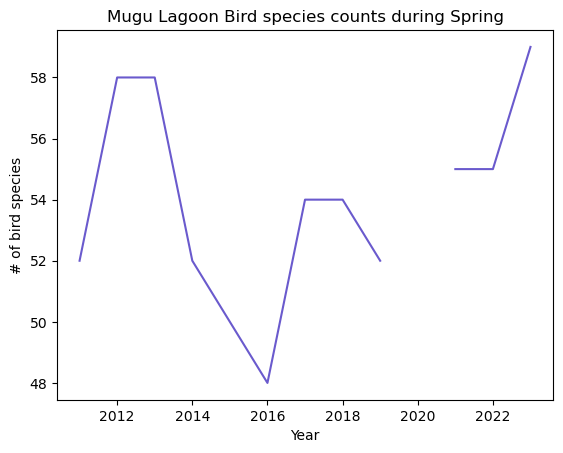

In [2]:
df.plot(x='year',
       y='MUL_spring',
       title='Mugu Lagoon Bird species counts during Spring',
       xlabel='Year',
       ylabel='# of bird species',
       color='slateblue',
       legend=False)

Use the isna() method for pandas.Series and row selection to select the rows in which Mugu Lagoon has NAs during the spring survey.

In [4]:
df[pd.isna(df['MUL_spring'])]

,year,CSM_winter,CSM_spring,CSM_fall,MUL_winter,MUL_spring,MUL_fall,SDW_winter,SDW_spring,SDW_fall,TJE_winter,TJE_spring,TJE_fall
0,2010,39.0,40.0,50.0,45.0,NaN,61.0,NaN,75.0,85.0,NaN,NaN,81.0
10,2020,46.0,NaN,47.0,56.0,NaN,66.0,57.0,NaN,58.0,54.0,40.0,54.0


### Check in 2

- Without running the code, give a step-by-step breakdown of what this code is doing:

```python
df.set_index('year').loc[:,'SDW_winter':'TJE_fall'].plot()
```

- Is this code modifying the data frame df? Why or why not?

- Run the code and examine the graph. Do we have all the necessary information to make sure it makes sense to directly compare the surveys at these different sites?

**Answer**: This code is subsetting the columns from a slice from SDW_winter and TJE_fall and then setting the index as the year and then creating a basic plot of this info. It is not modifying the df, only taking the info and making a plot. This plot gives you info that allows you to compare the sites, it would be helpful to update the axis titles to know that the y axis is the count of bird species so that the graph makes more sense. 

<AxesSubplot:xlabel='year'>

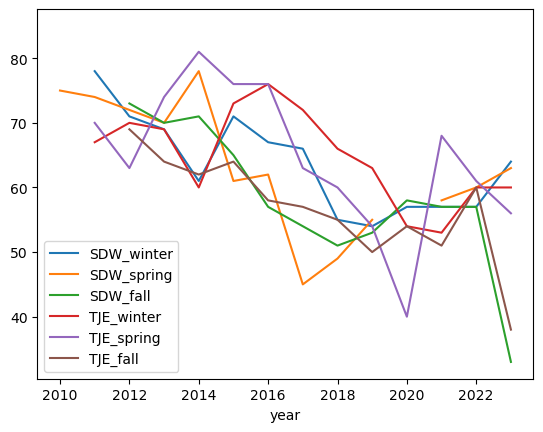

In [4]:
df.set_index('year').loc[:,'SDW_winter':'TJE_fall'].plot()

### Check in 3

- Select the bill_length_mm and bill_depth_mm columns in the penguins dataframe and then update the kind parameter to box to make boxplots of the bill length and bill depth.

- Create a histogram of the flipper length of female gentoo penguins.

<AxesSubplot:>

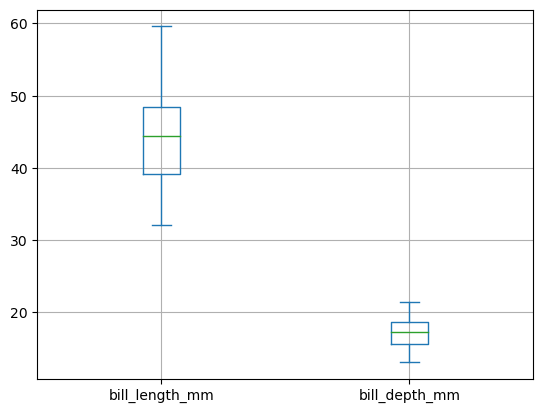

In [6]:
penguins[['bill_length_mm', 'bill_depth_mm']].plot(kind='box',
                                                  grid=True)

In [5]:
penguins.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009
343,Chinstrap,Dream,50.2,18.7,198.0,3775.0,female,2009


<AxesSubplot:title={'center':'Female Gentoo Penguin flipper lengths'}, ylabel='Frequency'>

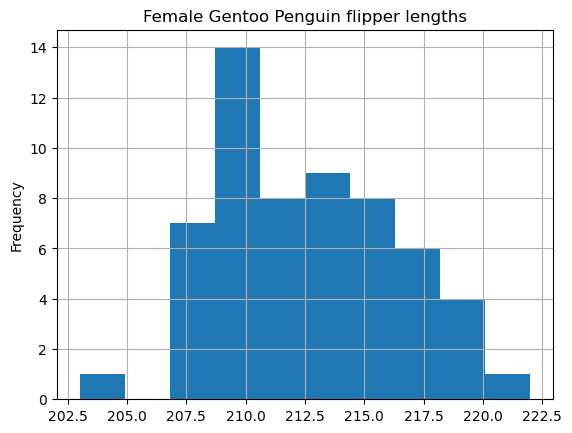

In [6]:
gentoo_female = penguins[(penguins['sex']=='female') & (penguins['species']== 'Gentoo') ]

gentoo_female['flipper_length_mm'].plot(kind='hist',
                                title='Female Gentoo Penguin flipper lengths',
                                xlabel='Flipper length (mm)',
                                grid=True)

# Lecture Notes 

## Method Chaining 

The code used ih Check in # 2 `df.set_index('year').loc[:,'SDW_winter':'TJE_fall'].plot()` is an example of **method chaining**.

Each method in the chain returns an object, allowing the next method to be called directly on the result. Great technique to make your code concise and readable. 

You can also break lines in method chaining. 

<AxesSubplot:xlabel='year'>

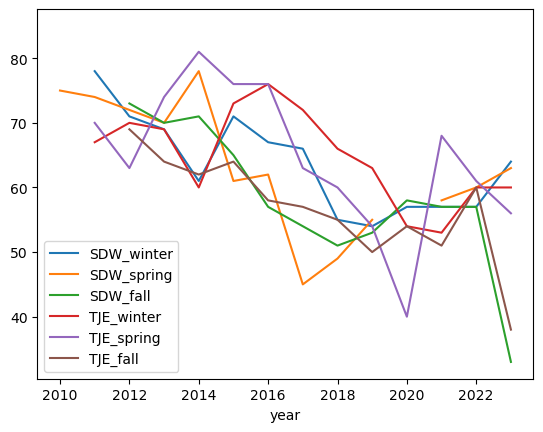

In [6]:
(df.set_index('year')
    .loc[:,'SDW_winter':'TJE_fall']
    .plot())

## About Palmer Penguins data 

We will use the Palmer penguins dataset. 
This dataset contains size measurements for three penguin species in the Palmer Archipelago, Antarctica during 2007, 2008, and 2009.

Let's look at the data:

In [7]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [8]:
# Check the column datatypes and NA values 
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [9]:
# Count the unique values in catergorical columns and year
penguins[['species', 'island', 'sex', 'year']].nunique()

species    3
island     3
sex        2
year       3
dtype: int64

In [10]:
# Count per unique value in species column 
penguins['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

## `kind` argument in `plot()`

`plot()` methods creates a line plot by default

### Scatter Plots 

<AxesSubplot:xlabel='flipper_length_mm', ylabel='body_mass_g'>

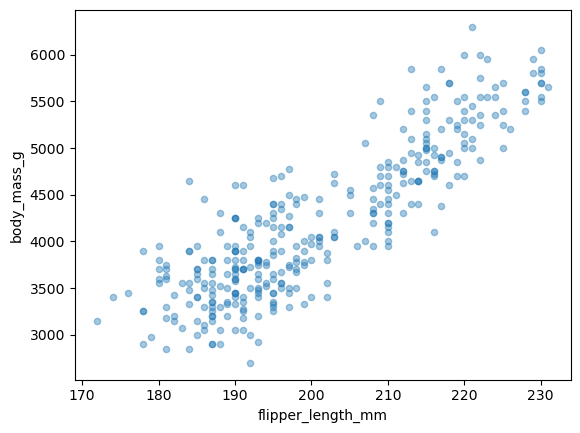

In [12]:
# Compare flipper lengths against the body mass using a scatterplot
penguins.plot(kind='scatter',
              x='flipper_length_mm', 
              y='body_mass_g',
             alpha=0.4) # controls transparency